# To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [25]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
# Import dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

print("First 5 rows of the Dataset index starting with 0")
dataset.head(5)

First 5 rows of the Dataset index starting with 0


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [27]:
print("Number of rows and columns")
dataset.shape

Number of rows and columns


(25, 2)

In [28]:
print("Summary statistics for numerical columns")
dataset.describe()

Summary statistics for numerical columns


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Data Visualization

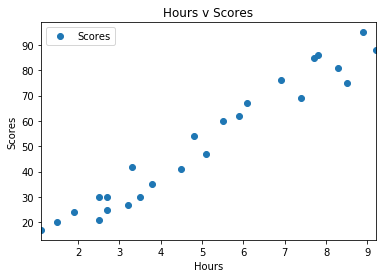

In [29]:
dataset.plot(x='Hours' , y='Scores', style='o')
plt.title('Hours v Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Dividing data into inputs and labels

In [30]:
# x representing hours and y representing scores
# Including all the columns except the last
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

### Splitting dataset into training set and test set using Scikit Learn


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Training model on training dataset
regressor.fit(x_train,y_train)

#Vector of predicted value of test set
y_pred = regressor.predict(x_test)

#Vector of predicted value of train set
y_train_pred = regressor.predict(x_train)



### Plotting Regression line on training set


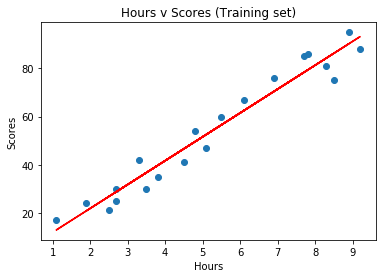

In [33]:
plt.scatter(x_train ,y_train )
plt.plot(x_train ,y_train_pred, color = 'red')
plt.title('Hours v Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Plotting Regression line on test set

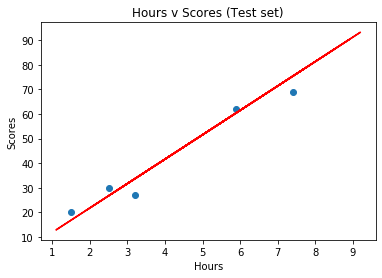

In [34]:
plt.scatter(x_test ,y_test )
plt.plot(x_train ,y_train_pred, color = 'red')
plt.title('Hours v Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Making Predictions

In [35]:
print("Comparing actual value of test set with the predicted")
df=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Actual','Predicted'])
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

Comparing actual value of test set with the predicted


,Hours,Actual,Predicted,Deviation
0,1.5,20.0,16.884145,3.115855
1,3.2,27.0,33.732261,6.732261
2,7.4,69.0,75.357018,6.357018
3,2.5,30.0,26.794801,3.205199
4,5.9,62.0,60.491033,1.508967


In [36]:
#Predicted score if a student study for 9.25 hrs
hrs=9.25
pred_score=regressor.predict([[hrs]])
print("Hours",hrs)
print("Predicted Score", pred_score)


Hours 9.25
Predicted Score [93.69173249]


### Regression Analysis and Evaluation of Model

#### R Square and Mean Square Error

In [42]:
pred_all_y = regressor.predict(x);

from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
r2=r2_score(y,pred_all_y)
rsm=np.sqrt(mean_squared_error(y_test, y_pred))
mean_abs_error=mean_absolute_error(y_test,y_pred)
print("R Sq: ", r2)
print("Mean Absolute Error",mean_abs_error)
print("Root Squared Error: ",rsm)

R Sq:  0.9526947647057274
Mean Absolute Error 4.183859899002975
Root Squared Error:  4.6474476121003665


The R sq value is 0.95 close to 1 and the value is positive -> Positive Correlation